#  Data Analysis and Visualization of a Stock Market

####  Import necessary libraries

In [70]:
import numpy as np 
import pandas as pd
# Data Visulzation
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf # stock market lib
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

## a) download the required prices, set your test set (the last 20 prices) and training set (the rest prices);

In [71]:
### Loading the dataset

# Download data for a specific company from Yahoo Finance (St. James's Place plc (STJ.L))
symbol = "STJ.L"  

start_date = "2020-03-02"
end_date = "2022-02-28"

data = yf.download(symbol, start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed


In [72]:
# Download data for a specific company from Yahoo Finance (Phoenix Group Holdings plc (PHNX.L))
benchmark = "PHNX.L"
start_date = "2020-03-02"
end_date = "2022-02-28"
df_benchmark = yf.download(benchmark, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [73]:
# Split the  competitor data into test and training sets
test_size = 20  # number of observations in test set
train_size = len(data) - test_size  # number of observations in training set
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [74]:
# Split the data into test and training sets
test_size = 20  # number of observations in test set
train_size = len(df_benchmark) - test_size  # number of observations in training set
bench_train_data = df_benchmark.iloc[:train_size]
bench_test_data =df_benchmark.iloc[train_size:]

In [75]:
## Read data from csv file and display first few rows

In [76]:
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1040.000000,1041.500000,976.799988,1001.500000,831.493408,3191410
2020-03-03,1016.000000,1039.000000,1014.500000,1016.000000,843.532043,2786044
2020-03-04,1017.500000,1026.500000,986.400024,995.400024,826.429016,4436614
2020-03-05,998.599976,1001.843018,963.799988,978.200012,812.148743,3340627
2020-03-06,960.200012,967.296021,936.599976,967.000000,802.849854,3764224


In [77]:
test_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,1497.0,1518.0,1480.0,1518.0,1405.960449,1449148
2022-02-01,1523.0,1555.5,1520.0,1534.5,1421.242798,1028916
2022-02-02,1540.0,1561.5,1540.0,1561.5,1446.250000,995103
2022-02-03,1558.0,1561.5,1532.0,1533.5,1420.316406,852366
2022-02-04,1532.0,1541.0,1511.0,1511.0,1399.477173,1470940


In [78]:
bench_train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,702.099976,707.554993,680.599976,697.700012,532.510498,2814853
2020-03-03,704.400024,724.200012,704.400024,708.000000,540.371765,2607708
2020-03-04,711.799988,730.400024,704.000000,713.000000,544.188049,2242124
2020-03-05,716.200012,718.921021,685.000000,694.500000,530.068115,2444033
2020-03-06,685.000000,694.000000,661.700012,683.900024,521.977783,2998306


In [79]:
# Since our time-frame of analysis is large, we can relax on number of decimal places to consider.

In [80]:
train_data = train_data.round(2)
train_data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1040.0,1041.5,976.8,1001.5,831.49,3191410
2020-03-03,1016.0,1039.0,1014.5,1016.0,843.53,2786044


In [81]:
test_data = test_data.round(2)
test_data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,1497.0,1518.0,1480.0,1518.0,1405.96,1449148
2022-02-01,1523.0,1555.5,1520.0,1534.5,1421.24,1028916


In [82]:
# the shape of the dataset
print(train_data.shape,test_data.shape)

(484, 6) (20, 6)


#  check if the dataset has any null values

In [83]:
train_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [84]:
test_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2020-03-02 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       504 non-null    float64
 1   High       504 non-null    float64
 2   Low        504 non-null    float64
 3   Close      504 non-null    float64
 4   Adj Close  504 non-null    float64
 5   Volume     504 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [86]:
# statistical analysis
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,484.000000,484.000000,484.000000,484.000000,484.000000,4.840000e+02
mean,1227.647583,1242.716405,1212.358967,1228.523347,1109.122417,1.467575e+06
std,289.892199,288.545989,292.703164,289.751676,287.910224,1.001813e+06
min,670.400000,727.800000,614.000000,660.000000,547.960000,1.073160e+05
25%,963.200000,974.900000,949.650000,962.550000,850.040000,8.684258e+05
50%,1197.750000,1212.625000,1183.500000,1200.250000,1062.940000,1.155073e+06
75%,1517.000000,1532.887500,1504.500000,1518.625000,1403.250000,1.704401e+06
max,1731.500000,1742.500000,1719.000000,1731.500000,1603.700000,7.461202e+06


-- I’ll use the describe() function of Pandas to get high-level overview of how the St. James's Place plc (STJ.L) and  Phoenix Group Holdings plc (PHNX.L)stock performed in about last couple of months. last 90 train dataset

In [87]:
data.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,1578,1594,1562,1578,1462,1097177
std,62,58,67,64,59,590784
min,1364,1430,1309,1339,1240,107316
25%,1536,1560,1523,1537,1424,707456
50%,1576,1588,1561,1580,1463,970170
75%,1616,1626,1598,1614,1495,1311668
max,1731,1742,1719,1731,1603,3298113


In last 90 days, the average closing price for  St. James's Place plc (STJ.L) stock was about 1509.
For about 75% of time the stock was trading below 1543 and it clocked maximum of 1655	. The maximum volume of shares traded on a single day was 3298113 with median quantity being 970170.


In [88]:
df_benchmark.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,658,664,652,658,579,2519660
std,16,16,16,17,15,2382623
min,602,614,588,589,518,296702
25%,649,655,646,650,572,1179895
50%,659,665,655,659,580,1588411
75%,667,670,659,665,586,2817332
max,700,704,693,701,617,13876739


In last 90 days, the average closing price for Phoenix Group Holdings plc (PHNX.L)  stock was about 579. For about 75% of time the stock was trading below 586 and it clocked maximum of 617 . The maximum volume of shares traded on a single day was 13876739 with median quantity being 1588411.

## demonstrate descriptive analysis on the prices and returns to investigate the trends and risks;

In [89]:


# Create traces for train and test data
trace_train = go.Scatter(x=train_data.index, y=train_data["Adj Close"], name="Train")
trace_test = go.Scatter(x=test_data.index, y=test_data["Adj Close"], name="Test")

# Create the layout for the plot
layout = go.Layout(title="Stock Prices for St. James's Place plc (STJ.L)",
                   xaxis=dict(title="Date"),
                   yaxis=dict(title="Price"),
                   hovermode="x unified")

# Combine the traces and layout and create the figure
fig = go.Figure(data=[trace_train, trace_test], layout=layout)

# Display the figure
fig.show()


In [90]:


# Create trace for train data
trace_train = go.Scatter(x=bench_train_data.index, y=bench_train_data["Adj Close"],
                         mode="lines", name="Train")

# Create trace for test data
trace_test = go.Scatter(x=bench_test_data.index, y=bench_test_data["Adj Close"],
                        mode="lines", name="Test")

# Create layout for the plot
layout = go.Layout(title="Stock Prices  for Phoenix Group Holdings plc (PHNX.L)",
                   xaxis=dict(title="Date"), yaxis=dict(title="Price"), 
                   legend=dict(x=0, y=1, traceorder="normal"))

# Combine traces and layout and create a Figure object
fig = go.Figure(data=[trace_train, trace_test], layout=layout)

# Show the plot
fig.show()


In [91]:
# b) Descriptive analysis

# Calculate the daily returns for the company
daily_returns = data["Adj Close"].pct_change()*100

# Print summary statistics for the returns
print("Summary statistics for daily returns for Stock Prices for St. James's Place plc (STJ.L):")
print(daily_returns.describe())

Summary statistics for daily returns for Stock Prices for St. James's Place plc (STJ.L):
count    503.000000
mean       0.115919
std        2.213220
min      -12.582785
25%       -0.817026
50%        0.168769
75%        1.139451
max       12.784320
Name: Adj Close, dtype: float64


In [92]:
# b) Descriptive analysis

# Calculate the daily returns for the company
bench_daily_returns = df_benchmark["Adj Close"].pct_change()*100

# Print summary statistics for the returns
print("Summary statistics for daily returns for Stock Prices for :")
print(bench_daily_returns.describe())

Summary statistics for daily returns for Stock Prices for :
count    503.000000
mean       0.025839
std        2.147556
min      -11.825266
25%       -0.770433
50%        0.027698
75%        0.889956
max       19.264092
Name: Adj Close, dtype: float64


In [93]:

from plotly.subplots import make_subplots

# Create subplots with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, subplot_titles=("St. James's Place plc (STJ.L)", "Phoenix Group Holdings plc (PHNX.L)"))

# Create traces for the first subplot
trace1 = go.Histogram(x=daily_returns, nbinsx=100, name="STJ.L")

# Create traces for the second subplot
trace2 = go.Histogram(x=bench_daily_returns, nbinsx=100, name="PHNX.L")

# Add the traces to the subplots
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

# Update the layout for the subplots
fig.update_layout(height=600, width=800, title_text="Daily Returns Histograms")

# Update the x-axis labels for each subplot
fig.update_xaxes(title_text="Daily Returns for STJ.L", row=1, col=1)
fig.update_xaxes(title_text="Daily Returns for PHNX.L", row=2, col=1)

# Update the y-axis labels for each subplot
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=1)

# Display the subplots
fig.show()


In [94]:

from plotly.subplots import make_subplots

# Create a subplot grid for the histograms
fig = make_subplots(rows=1, cols=2, subplot_titles=("STJ.L", "PHNX.L"))

# Define the traces for the histograms
trace1 = go.Histogram(x=daily_returns, nbinsx=30, name="STJ.L")
trace2 = go.Histogram(x=bench_daily_returns, nbinsx=30, name="PHNX.L")

# Add the traces to the figure as subplots
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

# Update the layout for the figure
fig.update_layout(
    title_text="Daily Returns for STJ.L and PHNX.L",
    xaxis=dict(title="Daily Returns"),
    yaxis=dict(title="Frequency"),
    bargap=0.2,
    bargroupgap=0.1,
)

# Show the figure
fig.show()


In [95]:

# Create traces for daily returns of STJ.L and PHNX.L
trace_stj = go.Scatter(x=daily_returns.index, y=daily_returns, name="STJ.L")
trace_phnx = go.Scatter(x=bench_daily_returns.index, y=bench_daily_returns, name="PHNX.L")

# Create the subplot layout
fig = make_subplots(rows=2, cols=1, subplot_titles=("Daily Returns for St. James's Place plc (STJ.L)", "Daily Returns for Phoenix Group Holdings plc (PHNX.L)"))

# Add the traces to the subplot
fig.add_trace(trace_stj, row=1, col=1)
fig.add_trace(trace_phnx, row=2, col=1)

# Set the axis labels
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Return", row=1, col=1)
fig.update_yaxes(title_text="Return", row=2, col=1)

# Set the title for the figure
fig.update_layout(title="Daily Returns for STJ.L and PHNX.L", height=700)

# Display the figure
fig.show()


In [96]:


# Calculate the rolling mean and standard deviation of returns for STJ.L
rolling_mean = daily_returns.rolling(window=10).mean()
rolling_std = daily_returns.rolling(window=10).std()

# Calculate the rolling mean and standard deviation of returns PHMX.L
ben_rolling_mean = bench_daily_returns.rolling(window=10).mean()
ben_rolling_std = bench_daily_returns.rolling(window=10).std()

# Create a subplot for the daily returns, rolling mean, and rolling standard deviation of STJ.L
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("STJ.L", "PHMX.L"))
#trace_daily_returns = go.Scatter(x=daily_returns.index, y=daily_returns.values, name="Daily Returns")
trace_rolling_mean = go.Scatter(x=rolling_mean.index, y=rolling_mean.values, name="Rolling Mean")
trace_rolling_std = go.Scatter(x=rolling_std.index, y=rolling_std.values, name="Rolling Std")
#fig.add_trace(trace_daily_returns, row=1, col=1)
fig.add_trace(trace_rolling_mean, row=1, col=1)
fig.add_trace(trace_rolling_std, row=1, col=1)

# Create a subplot for the daily returns, rolling mean, and rolling standard deviation of PHMX.L
#trace_ben_daily_returns = go.Scatter(x=bench_daily_returns.index, y=bench_daily_returns.values, name="Daily Returns")
trace_ben_rolling_mean = go.Scatter(x=ben_rolling_mean.index, y=ben_rolling_mean.values, name="Rolling Mean")
trace_ben_rolling_std = go.Scatter(x=ben_rolling_std.index, y=ben_rolling_std.values, name="Rolling Std")
#fig.add_trace(trace_ben_daily_returns, row=2, col=1)
fig.add_trace(trace_ben_rolling_mean, row=2, col=1)
fig.add_trace(trace_ben_rolling_std, row=2, col=1)

# Set the axis labels and titles
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="STJ.L", row=1, col=1)
fig.update_yaxes(title_text="PHMX.L", row=2, col=1)
fig.update_layout(title=", Rolling Mean, and Rolling Std for STJ.L and PHMX.L",
                  height=600,
                  showlegend=True)

# Display the plot
fig.show()



## visualise the training set, demonstrate moving average crossover trading strategy on it, and estimate the returns of your strategy;

In [97]:

from plotly.subplots import make_subplots

# Create subplot with one row and two columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("STJ.L Training Set", "PHNX.L Training Set"))

# Add trace for STJ.L training data
trace_stj = go.Scatter(x=train_data.index, y=train_data["Adj Close"], name="Training Set")
fig.add_trace(trace_stj, row=1, col=1)

# Add trace for PHNX.L training data
trace_phnx = go.Scatter(x=bench_train_data.index, y=bench_train_data["Adj Close"], name="Training Set")
fig.add_trace(trace_phnx, row=1, col=2)

# Update the layout
fig.update_layout(height=600, width=1000, title_text="Training Sets for STJ.L and PHNX.L")

# Show the plot
fig.show()


In [98]:
# c) Moving average crossover trading strategy
ma50 = data["Adj Close"].rolling(window=50).mean()
ma200 = data["Adj Close"].rolling(window=200).mean()
data["Signal"] = 0.0
data["Signal"][50:] = np.where(ma50[50:] > ma200[50:], 1.0, 0.0)
data["Position"] = data["Signal"].diff()
data["Returns"] = np.log(data["Adj Close"] / data["Adj Close"].shift(1))
data["Strategy Returns"] = data["Position"] * data["Returns"].shift(-1)
data["Cumulative Returns"] = data["Strategy Returns"].cumsum().apply(np.exp)


# Calculate the returns of the strategy
strategy_return = data["Strategy Returns"].sum()
strategy_annual_return = (np.exp(strategy_return / len(data)) - 1) * 252
print(f"Total return of the strategy for STJ.L : {strategy_return:.4f}")
print(f"Annual return of the strategy STJ.L: {strategy_annual_return:.4f}")


Total return of the strategy for STJ.L : -0.0037
Annual return of the strategy STJ.L: -0.0018


In [99]:


# Calculate the moving averages
ma50 =data["Adj Close"].rolling(window=50).mean()
ma200 =data["Adj Close"].rolling(window=200).mean()

# Create a trace for the stock prices
trace1 = go.Scatter(
    x=data.index,
    y=data["Adj Close"],
    mode="lines",
    name="Stock Price"
)

# Create a trace for the 50-day moving average
trace2 = go.Scatter(
    x=data.index,
    y=ma50,
    mode="lines",
    name="50-Day Moving Average"
    
)

# Create a trace for the 200-day moving average
trace3 = go.Scatter(
    x=data.index,
    y=ma200,
    mode="lines",
    name="200-Day Moving Average"
)

# Create a trace for the trading signals
trace4 = go.Scatter(
    x=data[data["Position"] == 1].index,
    y=data["Adj Close"][data["Position"] == 1],
    mode="markers",
    name="Buy Signal",
    marker=dict(size=10, symbol="triangle-up", color="black")
)

trace5 = go.Scatter(
    x=data[data["Position"] == -1].index,
    y=data["Adj Close"][data["Position"] == -1],
    mode="markers",
    name="Sell Signal",
    marker=dict(size=10, symbol="triangle-down", color="red")
    
    
    
)



# Combine the traces into a data list
data1 = [trace1, trace2, trace3, trace4, trace5]

# Define the layout of the plot
layout = go.Layout(
    title="Moving Average Crossover Trading Strategy for St. James's Place plc (STJ.L) ",
    xaxis=dict(title="Date"),
    yaxis=dict(title="Price"),
    legend=dict(orientation="h")
)

# Create the plot
fig = go.Figure(data=data1, layout=layout)
fig.show()


In [100]:

# Moving average crossover trading strategy for benchmark PHNX.L
bench_ma50 = df_benchmark["Adj Close"].rolling(window=50).mean()
bench_ma200 = df_benchmark["Adj Close"].rolling(window=200).mean()
df_benchmark["Signal"] = 0.0
df_benchmark["Signal"][50:] = np.where(bench_ma50[50:] > bench_ma200[50:], 1.0, 0.0)
df_benchmark["Position"] = df_benchmark["Signal"].diff()
df_benchmark["Returns"] = np.log(df_benchmark["Adj Close"] / df_benchmark["Adj Close"].shift(1))
df_benchmark["Strategy Returns"] = df_benchmark["Position"] * df_benchmark["Returns"].shift(-1)
df_benchmark["Cumulative Returns"] =df_benchmark["Strategy Returns"].cumsum().apply(np.exp)


# Calculate the returns of the benchmark strategy
bench_strategy_return = df_benchmark["Strategy Returns"].sum()
bench_strategy_annual_return = (np.exp(bench_strategy_return / len(df_benchmark)) - 1) * 252
print(f"Total return of the benchmark(PHNX.L) strategy: {bench_strategy_return:.4f}")
print(f"Annual return of the benchmark(PHNX.L) strategy: {bench_strategy_annual_return:.4f}")


Total return of the benchmark(PHNX.L) strategy: -0.0014
Annual return of the benchmark(PHNX.L) strategy: -0.0007


In [101]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

phnx_ma50 = df_benchmark["Adj Close"].rolling(window=50).mean()
phnx_ma200 = df_benchmark["Adj Close"].rolling(window=200).mean()

# Create subplot grid
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Add the stock prices for PHNX.L
fig.add_trace(go.Scatter(x=df_benchmark.index, y=df_benchmark["Adj Close"], name="PHNX.L"), row=1, col=1)

# Add the moving averages and the signals for PHNX.L
fig.add_trace(go.Scatter(x=df_benchmark.index, y=phnx_ma50, name="MA50"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_benchmark.index, y=phnx_ma200, name="MA200"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_benchmark.index, y=np.where(phnx_ma50 > phnx_ma200, df_benchmark["Adj Close"], np.nan), mode="markers", name=" Buying Period"), row=1, col=1)

fig.add_trace(go.Scatter(x=df_benchmark[df_benchmark["Position"]==1].index, y=df_benchmark[df_benchmark["Position"]==1],  mode="markers", name="Buy Signal2",marker=dict(size=10, symbol="triangle-up", color="green")), row=1, col=1)

fig.add_trace(go.Scatter(x=df_benchmark[df_benchmark["Position"]== -1].index, y=df_benchmark[df_benchmark["Position"]== -1],  mode="markers", name="Buy Signal2",marker=dict(size=10, symbol="triangle-down", color="red")), row=1, col=1)




fig.update_layout(title="Moving Average Crossover Trading Strategy", height=800)
fig.show()


In [102]:
# Calculate the moving averages for MWRK and PHNX.L

# Visualize the cumulative returns of the trading strategy and the benchmark
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add the cumulative returns for MWRK
fig.add_trace(go.Scatter(x=data.index, y=data["Cumulative Returns"], name="STJ.L"), row=1, col=1)

# Add the cumulative returns for PHNX.L
fig.add_trace(go.Scatter(x=df_benchmark.index, y=df_benchmark["Cumulative Returns"], name="PHNX.L"), row=2, col=1)

fig.update_layout(title="Moving Average Crossover Trading Strategy(Cumulative Returns) vs. Benchmark", height=800)
fig.show()




In [103]:

data["Cumulative Returns"].mean()

0.9977674784261923

In [104]:
df_benchmark["Cumulative Returns"].mean()

1.0012316530253673

In [105]:
# c1) Moving average crossover trading strategy


# Calculate the short-term and long-term moving averages
short_window = 50
long_window = 200
short_ma = data["Adj Close"].rolling(window=short_window).mean()
long_ma = data["Adj Close"].rolling(window=long_window).mean()

# Create a new DataFrame for the signals
signals = pd.DataFrame(index=data.index)
signals["Signal"] = 0.0

# Generate the signals
signals["Signal"][short_window:] = np.where(short_ma[short_window:] > long_ma[short_window:], 1.0, 0.0)

# Calculate the positions based on the signals
positions = signals["Signal"].diff()


# Buy or sell based on the positions
num_shares = 1000  # asuming 1000 the number of shares to trade
portfolio = pd.DataFrame(index=data.index)
portfolio["Positions"] = positions
portfolio["Company"] = num_shares * data["Adj Close"]
portfolio["Cash"] = -1.0 * portfolio["Positions"] * data["Adj Close"]
portfolio["Total"] = portfolio["Company"] + portfolio["Cash"]
portfolio["Returns"] = portfolio["Total"].pct_change()

# Calculate the cumulative returns
cumulative_returns = (portfolio["Returns"] + 1).cumprod()


 #Print the final portfolio value and returns
final_value = portfolio["Total"][-1]
total_returns = cumulative_returns[-1] - 1.0
print(f"Final portfolio value for STJ.L: {final_value:.2f}")
print(f"Total returns for STJ.L: {total_returns:.2f}")




Final portfolio value for STJ.L: 1316119.87
Total returns for STJ.L: 0.56


In [106]:



# Calculate the short-term and long-term moving averages
short_window = 50
long_window = 200
short_ma = df_benchmark["Adj Close"].rolling(window=short_window).mean()
long_ma = df_benchmark["Adj Close"].rolling(window=long_window).mean()

# Create a new DataFrame for the signals
signals = pd.DataFrame(index=df_benchmark.index)
signals["Signal"] = 0.0

# Generate the signals
signals["Signal"][short_window:] = np.where(short_ma[short_window:] > long_ma[short_window:], 1.0, 0.0)

# Calculate the positions based on the signals
positions = signals["Signal"].diff()


# Buy or sell based on the positions
num_shares = 1000  # asuming 1000 the number of shares to trade
portfolio = pd.DataFrame(index=df_benchmark.index)
portfolio["Positions"] = positions
portfolio["Company"] = num_shares * df_benchmark["Adj Close"]
portfolio["Cash"] = -1.0 * portfolio["Positions"] * df_benchmark["Adj Close"]
portfolio["Total"] = portfolio["Company"] + portfolio["Cash"]
portfolio["Returns"] = portfolio["Total"].pct_change()

# Calculate the cumulative returns
cumulative_returns = (portfolio["Returns"] + 1).cumprod()


 #Print the final portfolio value and returns
final_value = portfolio["Total"][-1]
total_returns = cumulative_returns[-1] - 1.0
print(f"Final portfolio value for benchmark company: {final_value:.2f}")
print(f"Total returns for benchmark company: {total_returns:.2f}")





Final portfolio value for benchmark company: 540710.08
Total returns for benchmark company: 0.00


In [107]:
# apply exponential smoothing techniques (single, double, Winter’s) on the training set to generate 20 forecasts, compare the forecasts with test set, and appraise the techniques comprehensively

In [108]:
from statsmodels.tsa.api import ExponentialSmoothing


In [109]:
train_data.index = pd.date_range(start=train_data.index.min(), periods=len(train_data), freq='M')
train_data = train_data.resample('M').ffill()


test_data.index = pd.date_range(start=test_data.index.min(), periods=len(test_data), freq='M')
test_data = test_data.resample('M').ffill()

# Single exponential smoothing
model_single = ExponentialSmoothing(train_data["Adj Close"], trend="add", seasonal=None, ).fit()
forecast_single = model_single.forecast(20)

# Double exponential smoothing
model_double = ExponentialSmoothing(train_data["Adj Close"], trend="add", seasonal="add",freq="M").fit()
forecast_double = model_double.forecast(20)

# Winter's exponential smoothing
model_winter = ExponentialSmoothing(train_data["Adj Close"], trend="add",freq="M", seasonal="add", seasonal_periods=12).fit()
forecast_winter = model_winter.forecast(20)

# Create a subplot with 2 rows and 1 column
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Add the training and test data to the first subplot
fig.add_trace(go.Scatter(x=train_data.index, y=train_data["Adj Close"], name="Training Set"), row=1, col=1)
fig.add_trace(go.Scatter(x=test_data.index, y=test_data["Adj Close"], name="Test Set"), row=1, col=1)

# Add the forecasts to the first subplot
fig.add_trace(go.Scatter(x=forecast_single.index, y=forecast_single.values, name="Single Exponential Smoothing"), row=1, col=1)
fig.add_trace(go.Scatter(x=forecast_double.index, y=forecast_double.values, name="Double Exponential Smoothing"), row=1, col=1)
fig.add_trace(go.Scatter(x=forecast_winter.index, y=forecast_winter.values, name="Winter's Exponential Smoothing"), row=1, col=1)
fig.update_layout(title="Forecast Comparison for STJ.L ", height=800)
fig.show()




In [110]:
# Appraise the techniques
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error (MAE) and mean squared error (MSE) for each technique
mae_single = mean_absolute_error(test_data["Adj Close"], forecast_single.values)
mse_single = mean_squared_error(test_data["Adj Close"], forecast_single.values)
mae_double = mean_absolute_error(test_data["Adj Close"], forecast_double.values)
mse_double = mean_squared_error(test_data["Adj Close"], forecast_double.values)
mae_winter = mean_absolute_error(test_data["Adj Close"], forecast_winter.values)
mse_winter = mean_squared_error(test_data["Adj Close"], forecast_winter.values)

# Print the MAE and MSE for each technique
print("Single Exponential Smoothing for STJ.L")
print(f"MAE: {mae_single:.2f}")
print(f"MSE: {mse_single:.2f}")
print("\nDouble Exponential Smoothing for STJ.L")
print(f"MAE: {mae_double:.2f}")
print(f"MSE: {mse_double:.2f}")
print("\nWinter's Exponential Smoothing for STJ.L")
print(f"MAE: {mae_winter:.2f}")
print(f"MSE: {mse_winter:.2f}")

Single Exponential Smoothing for STJ.L
MAE: 44.82
MSE: 3114.88

Double Exponential Smoothing for STJ.L
MAE: 85.87
MSE: 8214.95

Winter's Exponential Smoothing for STJ.L
MAE: 85.87
MSE: 8214.95


In [111]:
bench_train_data.index = pd.date_range(start=bench_train_data.index.min(), periods=len(bench_train_data), freq='M')
bench_train_data = bench_train_data.resample('M').ffill()


bench_test_data.index = pd.date_range(start=bench_test_data.index.min(), periods=len(bench_test_data), freq='M')
bench_test_data = bench_test_data.resample('M').ffill()

# Single exponential smoothing
model_single = ExponentialSmoothing(bench_train_data["Adj Close"], trend="add", seasonal=None, ).fit()
forecast_single = model_single.forecast(20)

# Double exponential smoothing
model_double = ExponentialSmoothing(bench_train_data["Adj Close"], trend="add", seasonal="add",freq="M").fit()
forecast_double = model_double.forecast(20)

# Winter's exponential smoothing
model_winter = ExponentialSmoothing(bench_train_data["Adj Close"], trend="add",freq="M", seasonal="add", seasonal_periods=12).fit()
forecast_winter = model_winter.forecast(20)

# Create a subplot with 2 rows and 1 column
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Add the training and test data to the first subplot
fig.add_trace(go.Scatter(x=bench_train_data.index, y=bench_train_data["Adj Close"], name="Training Set"), row=1, col=1)
fig.add_trace(go.Scatter(x=bench_test_data.index, y=bench_test_data["Adj Close"], name="Test Set"), row=1, col=1)

# Add the forecasts to the first subplot
fig.add_trace(go.Scatter(x=forecast_single.index, y=forecast_single.values, name="Single Exponential Smoothing"), row=1, col=1)
fig.add_trace(go.Scatter(x=forecast_double.index, y=forecast_double.values, name="Double Exponential Smoothing"), row=1, col=1)
fig.add_trace(go.Scatter(x=forecast_winter.index, y=forecast_winter.values, name="Winter's Exponential Smoothing"), row=1, col=1)


fig.update_layout(title="Forecast Comparison for PHNX.L ", height=800)
fig.show()



In [112]:
# Appraise the techniques
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error (MAE) and mean squared error (MSE) for each technique
mae_single = mean_absolute_error(bench_test_data["Adj Close"], forecast_single.values)
mse_single = mean_squared_error(bench_test_data["Adj Close"], forecast_single.values)
mae_double = mean_absolute_error(bench_test_data["Adj Close"], forecast_double.values)
mse_double = mean_squared_error(bench_test_data["Adj Close"], forecast_double.values)
mae_winter = mean_absolute_error(bench_test_data["Adj Close"], forecast_winter.values)
mse_winter = mean_squared_error(bench_test_data["Adj Close"], forecast_winter.values)

# Print the MAE and MSE for each technique
print("Single Exponential Smoothing for PHNX.L")
print(f"MAE: {mae_single:.2f}")
print(f"MSE: {mse_single:.2f}")
print("\nDouble Exponential Smoothing for PHNX.L")
print(f"MAE: {mae_double:.2f}")
print(f"MSE: {mse_double:.2f}")
print("\nWinter's Exponential Smoothing for PHNX.L")
print(f"MAE: {mae_winter:.2f}")
print(f"MSE: {mse_winter:.2f}")

Single Exponential Smoothing for PHNX.L
MAE: 15.38
MSE: 555.22

Double Exponential Smoothing for PHNX.L
MAE: 15.58
MSE: 510.69

Winter's Exponential Smoothing for PHNX.L
MAE: 15.58
MSE: 510.69


## investigate the relationships among the stock prices of your company and competitor/benchmark (e.g. regression and CAPM).

In [113]:
#Merge the data for the C and the benchmark
merged_data = pd.merge(data["Adj Close"], df_benchmark["Adj Close"], left_index=True, right_index=True)
merged_data.columns = ["STJL", "PHNL"]

#Calculate the returns for the company and the benchmark
merged_data["STJL Returns"] = merged_data["STJL"].pct_change()
merged_data["PHNL Returns"] = merged_data["PHNL"].pct_change()

In [114]:


# Drop the first row since it contains NaN
merged_data = merged_data.dropna()

# Create a trace for the company returns
trace_company = go.Scatter(
    x = merged_data.index,
    y = merged_data['STJL Returns'],
    name = 'Company Returns'
)

# Create a trace for the benchmark returns
trace_benchmark = go.Scatter(
    x = merged_data.index,
    y = merged_data['PHNL Returns'],
    name = 'Benchmark Returns'
)

# Define the layout of the plot
layout = go.Layout(
    title = 'Returns',
    xaxis_title = 'Date',
    yaxis_title = 'Returns'
)

# Combine the traces and layout into a figure
fig = go.Figure(data=[trace_company, trace_benchmark], layout=layout)

# Show the figure
fig.show()


In [115]:
import statsmodels.api as sm
from scipy import stats


In [116]:
#Regression analysis
X = sm.add_constant(merged_data["PHNL Returns"])
model = sm.OLS(merged_data["STJL Returns"], X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:           STJL Returns   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     527.1
Date:                Wed, 31 May 2023   Prob (F-statistic):           3.08e-80
Time:                        11:24:16   Log-Likelihood:                 1384.4
No. Observations:                 503   AIC:                            -2765.
Df Residuals:                     501   BIC:                            -2756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0010      0.001      1.404   

In [117]:
#Calculate the CAPM parameters
beta = model.params[1]
risk_free_rate = 0.01 # replace with the current risk-free rate
market_return = merged_data["PHNL Returns"].mean()
expected_return = risk_free_rate + beta * (market_return - risk_free_rate)
print(f"Beta: {beta:.4f}")
print(f"Expected return: {expected_return:.4f}")

Beta: 0.7379
Expected return: 0.0028


In [118]:
# Define the variables
risk_free_rate = 0.02
expected_market_return = 0.08

# Calculate the expected return of our company
expected_return_company = risk_free_rate + beta * (expected_market_return - risk_free_rate)

# Calculate the expected return of the benchmark
expected_return_benchmark = expected_market_return

print('Expected return of the company:', expected_return_company)
print('Expected return of the benchmark:', expected_return_benchmark)


Expected return of the company: 0.06427544911825477
Expected return of the benchmark: 0.08


# Fundamental Analysis

In [143]:
Income_Statement= pd.read_excel("fin_stj.xlsx",sheet_name="income",index_col=0)
balance_sheet= pd.read_excel("fin_stj.xlsx",sheet_name="balance",index_col=0)
cash_flow= pd.read_excel("fin_stj.xlsx",sheet_name="cash",index_col=0)

In [144]:
Income_Statement

,2021,2020,2019
Breakdown,,,
Total Revenue,17937900.00,8061000.00,16563500.00
Total Expenses,17095500.00,7634600.00,15854600.00
Pretax Income,842400.00,426400.00,708900.00
Tax Provision,554800.00,164400.00,562300.00
Net Income Common Stockholders,286700.00,262000.00,146600.00
Diluted NI Available to Com Stockholders,286700.00,262000.00,146600.00
Basic EPS,0.53,0.49,0.28
Diluted EPS,0.53,0.49,0.28
Basic Average Shares,537700.00,533500.00,531300.00


In [121]:
cash_flow

,2021,2020,2019
Breakdown,,,
Operating Cash Flow,1429600,-124100,365400
Investing Cash Flow,-25100,-49200,-29200
Financing Cash Flow,-231600,-179800,-200100
End Cash Position,7832900,6660100,7013600
Capital Expenditure,-22600,-26800,-26200
Issuance of Capital Stock,18700,3300,8900
Issuance of Debt,576400,270000,390000
Repayment of Debt,-486100,-332100,-334800
Repurchase of Capital Stock,0,-3900,-100


In [122]:
balance_sheet

,2021,2020,2019
Breakdown,,,
Total Assets,155729900,129881300,117292000
Total Liabilities Net Minority Interest,154610700,128769200,116344800
Total Equity Gross Minority Interest,1119200,1112100,947200
Total Capitalization,1552200,1454800,1351800
Common Stock Equity,1119200,1113000,948100
Capital Lease Obligations,124100,132700,118600
Net Tangible Assets,1048200,1040900,902800
Invested Capital,1552200,1454800,1351800
Tangible Book Value,1048200,1040900,902800


In [123]:

# Transpose the dataframes for easier visualization
income_statement = Income_Statement.T
balance_sheet = balance_sheet.T
cash_flow_statement = cash_flow.T

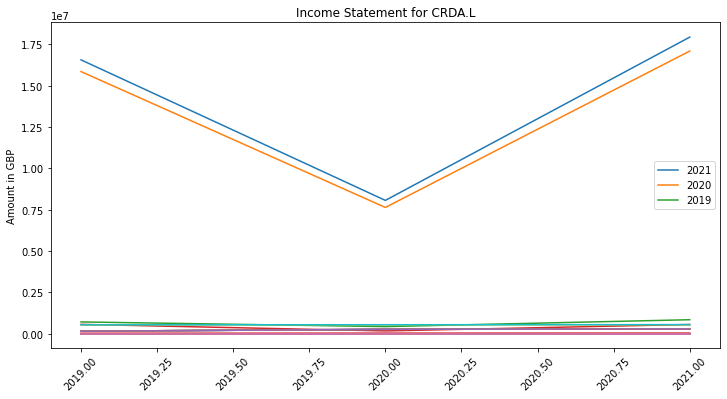

In [124]:
# Visualize Income Statement for CRDA.L
plt.figure(figsize=(12, 6))
plt.title("Income Statement for CRDA.L")
plt.plot(income_statement)
plt.legend(income_statement.index)
plt.xticks(rotation=45)
plt.ylabel("Amount in GBP")
plt.show()

In [125]:
income_statement.columns

Index(['Total Revenue', 'Total Expenses', 'Pretax Income', 'Tax Provision',
       'Net Income Common Stockholders',
       'Diluted NI Available to Com Stockholders', 'Basic EPS', 'Diluted EPS',
       'Basic Average Shares', 'Diluted Average Shares',
       'Net Income from Continuing & Discontinued Operation',
       'Normalized Income', 'Rent Expense Supplemental',
       'Reconciled Depreciation',
       'Net Income from Continuing Operation Net Minority Interest',
       'Tax Rate for Calcs', 'Tax Effect of Unusual Items'],
      dtype='object', name='Breakdown')

In [126]:
balance_sheet.columns

Index(['Total Assets', 'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'Common Stock Equity', 'Capital Lease Obligations',
       'Net Tangible Assets', 'Invested Capital', 'Tangible Book Value',
       'Total Debt', 'Net Debt', 'Share Issued', 'Ordinary Shares Number',
       'Treasury Shares Number'],
      dtype='object', name='Breakdown')

In [127]:
#Create subplots for each financial statement
fig = make_subplots(rows=3, cols=1, subplot_titles=("Income Statement", "Balance Sheet", "Cash Flow Statement"))

#Add traces for income statement
fig.add_trace(go.Scatter(x=income_statement.index, y=income_statement['Total Revenue'], mode='lines', name='Total Revenue'), row=1, col=1)
fig.add_trace(go.Scatter(x=income_statement.index, y=income_statement['Total Expenses'], mode='lines', name='Total Expenses'), row=1, col=1)
fig.add_trace(go.Scatter(x=income_statement.index, y=income_statement['Net Income from Continuing Operation Net Minority Interest'], mode='lines', name='Net Income'), row=1, col=1)

#Add traces for balance sheet
fig.add_trace(go.Scatter(x=balance_sheet.index, y=balance_sheet['Total Assets'], mode='lines', name='Total Assets'), row=2, col=1)
fig.add_trace(go.Scatter(x=balance_sheet.index, y=balance_sheet['Total Liabilities Net Minority Interest'], mode='lines', name='Total Liabilities'), row=2, col=1)
fig.add_trace(go.Scatter(x=balance_sheet.index, y=balance_sheet['Total Equity Gross Minority Interest'], mode='lines', name='Equity'), row=2, col=1)

#Add traces for cash flow statement
fig.add_trace(go.Scatter(x=cash_flow_statement.index, y=cash_flow_statement['Operating Cash Flow'], mode='lines', name='Operating Cash Flow'), row=3, col=1)
fig.add_trace(go.Scatter(x=cash_flow_statement.index, y=cash_flow_statement['Investing Cash Flow'], mode='lines', name='Investing Cash Flow'), row=3, col=1)
fig.add_trace(go.Scatter(x=cash_flow_statement.index, y=cash_flow_statement['Financing Cash Flow'], mode='lines', name='Financing Cash Flow'), row=3, col=1)
fig.add_trace(go.Scatter(x=cash_flow_statement.index, y=cash_flow_statement['End Cash Position'], mode='lines', name='Net Change in Cash'), row=3, col=1)

#Update layout and axes
fig.update_layout(height=800, width=800, showlegend=True, legend=dict(x=0, y=1), title=dict(text='Financial Statements'))

#Display the plot
fig.show()








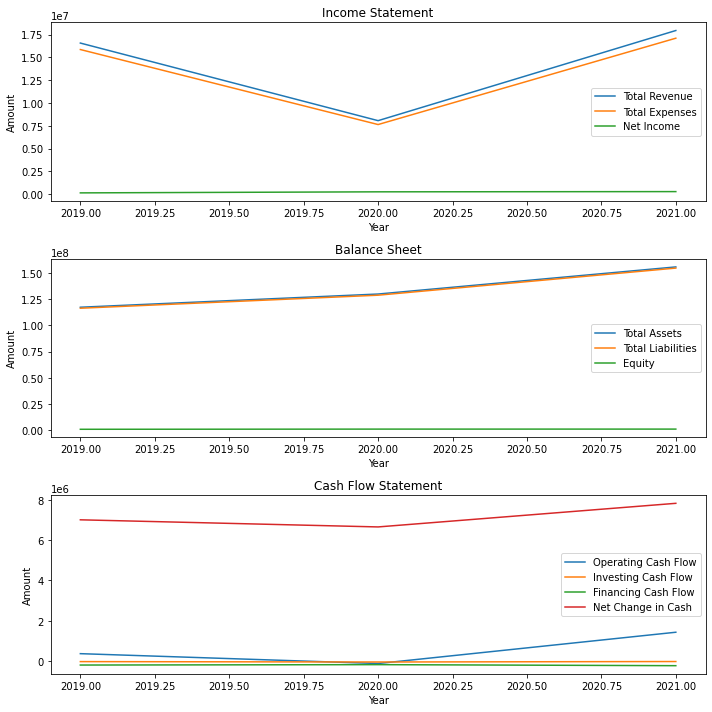

In [128]:
# Create subplots for each financial statement
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# Plot the income statement on the first subplot
axs[0].plot(income_statement.index, income_statement['Total Revenue'], label='Total Revenue')

axs[0].plot(income_statement.index, income_statement['Total Expenses'], label='Total Expenses')
axs[0].plot(income_statement.index, income_statement['Net Income from Continuing Operation Net Minority Interest'], label='Net Income')


axs[0].set_title('Income Statement')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Amount')
axs[0].legend()

# Plot the balance sheet on the second subplot
axs[1].plot(balance_sheet.index, balance_sheet['Total Assets'], label='Total Assets')
axs[1].plot(balance_sheet.index, balance_sheet['Total Liabilities Net Minority Interest'], label='Total Liabilities')
axs[1].plot(balance_sheet.index, balance_sheet['Total Equity Gross Minority Interest'], label='Equity')
axs[1].set_title('Balance Sheet')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Amount')
axs[1].legend()

# Plot the cash flow statement on the third subplot
axs[2].plot(cash_flow_statement.index, cash_flow_statement['Operating Cash Flow'], label='Operating Cash Flow')
axs[2].plot(cash_flow_statement.index, cash_flow_statement['Investing Cash Flow'], label='Investing Cash Flow')
axs[2].plot(cash_flow_statement.index, cash_flow_statement['Financing Cash Flow'], label='Financing Cash Flow')
axs[2].plot(cash_flow_statement.index, cash_flow_statement['End Cash Position'], label='Net Change in Cash')
axs[2].set_title('Cash Flow Statement')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Amount')
axs[2].legend()

# Adjust the layout and spacing of the subplots
fig.tight_layout()

# Display the plot
plt.show()


In [129]:

# Create subplots for each financial statement
fig = make_subplots(rows=3, cols=1, subplot_titles=('Income Statement', 'Balance Sheet', 'Cash Flow Statement'))

# Plot the income statement on the first subplot
fig.add_trace(go.Bar(x=income_statement.index, y=income_statement['Total Revenue'], name='Revenue',
              text=income_statement['Total Revenue'].apply(lambda x: f'£{x:,.2f}')), row=1, col=1)
fig.add_trace(go.Bar(x=income_statement.index, y=-income_statement['Total Expenses'], name='Total Expenses',
                    text=income_statement['Total Expenses'].apply(lambda x: f'£{x:,.2f}')), row=1, col=1)
fig.add_trace(go.Bar(x=income_statement.index, y=income_statement['Net Income from Continuing Operation Net Minority Interest'], name='Net Income',
                    text=income_statement['Net Income from Continuing Operation Net Minority Interest'].apply(lambda x: f'£{x:,.2f}')), row=1, col=1)

# Plot the balance sheet on the second subplot
fig.add_trace(go.Bar(x=balance_sheet.index, y=balance_sheet['Total Assets'], name='Total Assets',
                    text=balance_sheet['Total Assets'].apply(lambda x: f'£{x:,.2f}')), row=2, col=1)
fig.add_trace(go.Bar(x=balance_sheet.index, y=-balance_sheet['Total Liabilities Net Minority Interest'], name='Total Liabilities',text=balance_sheet['Total Liabilities Net Minority Interest'].apply(lambda x: f'£{x:,.2f}')), row=2, col=1)
fig.add_trace(go.Bar(x=balance_sheet.index, y=balance_sheet['Total Equity Gross Minority Interest'], name='Equity',
                    text=balance_sheet['Total Equity Gross Minority Interest'].apply(lambda x: f'£{x:,.2f}')), row=2, col=1)

# Plot the cash flow statement on the third subplot
fig.add_trace(go.Bar(x=cash_flow_statement.index, y=cash_flow_statement['Operating Cash Flow'], name='Operating Cash Flow',text=cash_flow_statement['Operating Cash Flow'].apply(lambda x: f'£{x:,.2f}')), row=3, col=1)
fig.add_trace(go.Bar(x=cash_flow_statement.index, y=cash_flow_statement['Investing Cash Flow'], name='Investing Cash Flow',text=cash_flow_statement['Investing Cash Flow']), row=3, col=1)
fig.add_trace(go.Bar(x=cash_flow_statement.index, y=cash_flow_statement['Financing Cash Flow'], name='Financing Cash Flow',text=cash_flow_statement['Financing Cash Flow']), row=3, col=1)
fig.add_trace(go.Bar(x=cash_flow_statement.index, y=cash_flow_statement['End Cash Position'], name='Net Change in Cash',
                    text=cash_flow_statement['End Cash Position']), row=3, col=1)

# Update the layout of the subplots
fig.update_layout(height=1000, width=800, title="Financial Statements for St. James's Place plc (STJ.L)")

# Display the plot
fig.show()


In [130]:

# Create a list of trace objects for each financial statement
traces = []

# Create a trace for the income statement
trace_income_statement = go.Bar(
    x=income_statement.index,
    y=income_statement['Net Income from Continuing Operation Net Minority Interest'],
    name='Net Income',
    text=income_statement['Net Income from Continuing Operation Net Minority Interest'].apply(lambda x: f'${x:,.2f}'),
    textposition='inside',
    marker=dict(color='#1f77b4'),
)

# Create a trace for the balance sheet
trace_balance_sheet = go.Bar(
    x=balance_sheet.index,
    y=balance_sheet['Total Equity Gross Minority Interest'],
    name='Equity',
    text=balance_sheet['Total Equity Gross Minority Interest'].apply(lambda x: f'${x:,.2f}'),
    textposition='inside',
    marker=dict(color='#2ca02c'),
)

# Create a trace for the cash flow statement
trace_cash_flow_statement = go.Bar(
    x=cash_flow_statement.index,
    y=cash_flow_statement['End Cash Position'],
    name='Net Change in Cash',
    text=cash_flow_statement['End Cash Position'].apply(lambda x: f'${x:,.2f}'),
    textposition='inside',
    marker=dict(color='#d62728'),
)

# Add each trace object to the traces list
traces.append(trace_income_statement)
traces.append(trace_balance_sheet)
traces.append(trace_cash_flow_statement)

# Define the layout of the plot
layout = go.Layout(
    title='Financial Statements',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Amount'),
    barmode='stack',
    bargap=0.15,
    bargroupgap=0.1,
)

# Create the figure object
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()


In [131]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1)
# Add traces to the first subplot (Income Statement)
fig.add_trace(go.Bar(x=income_statement.index, y=income_statement['Total Revenue'], name='Revenue'), row=1, col=1)
fig.add_trace(go.Bar(x=income_statement.index, y=-income_statement['Total Expenses'], name='Total Expenses'), row=1, col=1)
fig.add_trace(go.Bar(x=income_statement.index, y=income_statement['Net Income from Continuing Operation Net Minority Interest'], name='Net Income'), row=1, col=1)

# Add traces to the second subplot (Balance Sheet)
fig.add_trace(go.Bar(x=balance_sheet.index, y=balance_sheet['Total Assets'], name='Total Assets'), row=2, col=1)
fig.add_trace(go.Bar(x=balance_sheet.index, y=-balance_sheet['Total Liabilities Net Minority Interest'], name='Total Liabilities'), row=2, col=1)
fig.add_trace(go.Bar(x=balance_sheet.index, y=balance_sheet['Total Equity Gross Minority Interest'], name='Equity'), row=2, col=1)

# Add traces to the third subplot (Cash Flow Statement)
fig.add_trace(go.Bar(x=cash_flow_statement.index, y=cash_flow_statement['Operating Cash Flow'], name='Operating Cash Flow'), row=3, col=1)
fig.add_trace(go.Bar(x=cash_flow_statement.index, y=cash_flow_statement['Investing Cash Flow'], name='Investing Cash Flow'), row=3, col=1)
fig.add_trace(go.Bar(x=cash_flow_statement.index, y=cash_flow_statement['Financing Cash Flow'], name='Financing Cash Flow'), row=3, col=1)
fig.add_trace(go.Bar(x=cash_flow_statement.index, y=cash_flow_statement['End Cash Position'], name='Net Change in Cash'), row=3, col=1)

fig.update_layout(
    title='Financial Statements',
    title_x=0.5,
    showlegend=True,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    xaxis=dict(
        title='Year',
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgray'
    ),
    barmode='relative',
    bargap=0.2,
    bargroupgap=0.1
)


In [132]:
income_statement

Breakdown,Total Revenue,Total Expenses,Pretax Income,Tax Provision,Net Income Common Stockholders,Diluted NI Available to Com Stockholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,Net Income from Continuing & Discontinued Operation,Normalized Income,Rent Expense Supplemental,Reconciled Depreciation,Net Income from Continuing Operation Net Minority Interest,Tax Rate for Calcs,Tax Effect of Unusual Items
2021,17937900.0,17095500.0,842400.0,554800.0,286700.0,286700.0,0.53,0.53,537700.0,546200.0,286700.0,286700.0,0.0,35900.0,286700.0,0.0,0.0
2020,8061000.0,7634600.0,426400.0,164400.0,262000.0,262000.0,0.49,0.49,533500.0,539300.0,262000.0,262000.0,0.0,31500.0,262000.0,0.0,0.0
2019,16563500.0,15854600.0,708900.0,562300.0,146600.0,146600.0,0.28,0.28,531300.0,534000.0,146600.0,146600.0,0.0,25300.0,146600.0,0.0,0.0


In [133]:
income_statement.columns

Index(['Total Revenue', 'Total Expenses', 'Pretax Income', 'Tax Provision',
       'Net Income Common Stockholders',
       'Diluted NI Available to Com Stockholders', 'Basic EPS', 'Diluted EPS',
       'Basic Average Shares', 'Diluted Average Shares',
       'Net Income from Continuing & Discontinued Operation',
       'Normalized Income', 'Rent Expense Supplemental',
       'Reconciled Depreciation',
       'Net Income from Continuing Operation Net Minority Interest',
       'Tax Rate for Calcs', 'Tax Effect of Unusual Items'],
      dtype='object', name='Breakdown')

In [134]:
balance_sheet.columns

Index(['Total Assets', 'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'Common Stock Equity', 'Capital Lease Obligations',
       'Net Tangible Assets', 'Invested Capital', 'Tangible Book Value',
       'Total Debt', 'Net Debt', 'Share Issued', 'Ordinary Shares Number',
       'Treasury Shares Number'],
      dtype='object', name='Breakdown')

In [136]:
# calculate liquidity ratios
liquidity_ratio = balance_sheet['Total Assets']/balance_sheet['Total Liabilities Net Minority Interest']



In [137]:
liquidity_ratio.values


array([1.00723883, 1.00863638, 1.00814132])